In [ ]:
#FILE EXTENSION CHANGER was used on local system

import os

files = os.listdir()

for file_name in files:
	with open(file_name, 'rb') as f:
		data = f.read()

	file_name = file_name.replace("jfif", "jpg")
	with open(file_name, 'w') as f:
		...
	with open(file_name, 'wb') as f:
		f.write(data)



In [ ]:
#THE DATASET WAS MADE ON BASIS OF THE ASSUMPTION THAT CAMERA FEED WOULD BE USED.

#DETAILS OF TRAINING AND CREATION OF MODEL AND ALL EXTRA WORK CAN BE FOUND AT: https://colab.research.google.com/drive/1SrZsqTrn3bUEO-gso3hHRL9jZ7pnAXx1?authuser=3#scrollTo=SnpKDgDQxAY4


from tensorflow.keras.callbacks import ModelCheckpoint

import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.layers.experimental.preprocessing import Rescaling, RandomFlip, RandomRotation, RandomZoom, RandomTranslation
from tensorflow.keras import regularizers

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False


checkpoint_path = DATA_DIR + "final.hdf5"
checkpoint = ModelCheckpoint(checkpoint_path,
                             save_weights_only=False,  # Save only the weights, not the entire model
                             save_best_only=True,# Save weights at the end of each epoch
                             monitor = 'val_loss',
                             mode = 'min',
                             verbose=1)

model = Sequential([

    RandomFlip(mode='horizontal'),
    RandomFlip(mode='vertical'),
    RandomRotation(factor=0.2),
    RandomZoom(height_factor=0.15, width_factor=0.15), #0.2 did not seem optimal size for zoom
    RandomTranslation(height_factor=0.2, width_factor=0.2),
    # layers.Conv2D(32, (3, 3), activation='relu'),
    base_model,
    GlobalAveragePooling2D(),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
    Dense(7, activation='softmax')
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0003), loss='sparse_categorical_crossentropy', metrics=['acc'])



history = model.fit(train,
                    epochs=40,
                    validation_data=val,
                    callbacks=[checkpoint])

# Plot the collected metrics
plt.figure(figsize=(12, 6))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

model.save_weights("224shape.h5")

model.save(DATA_DIR + '224shape.keras')

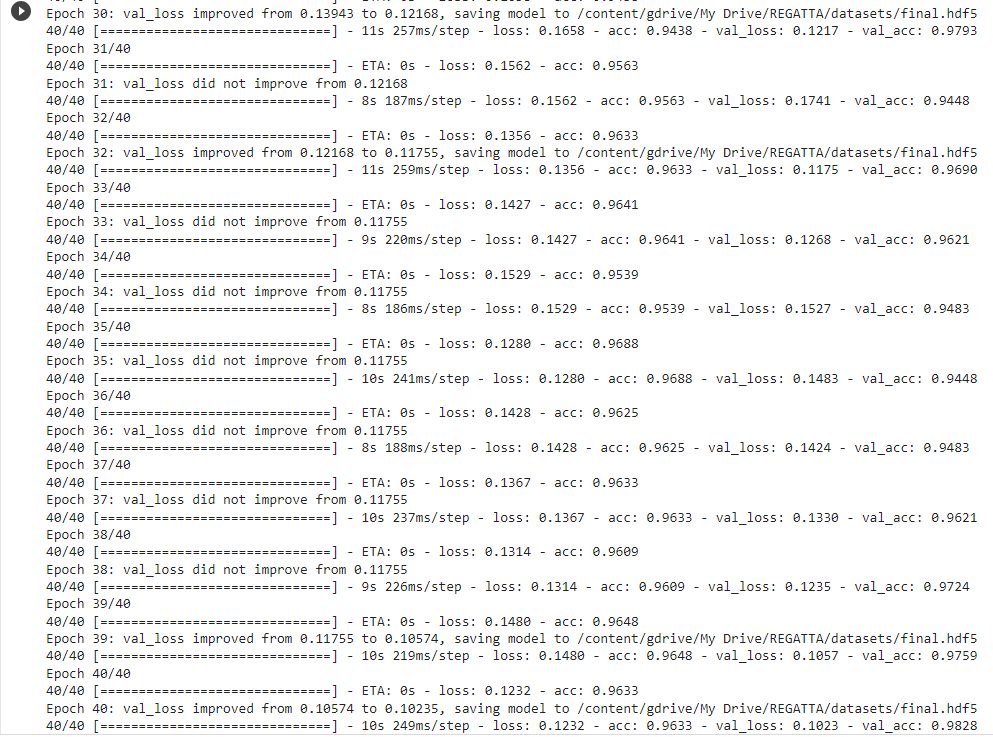

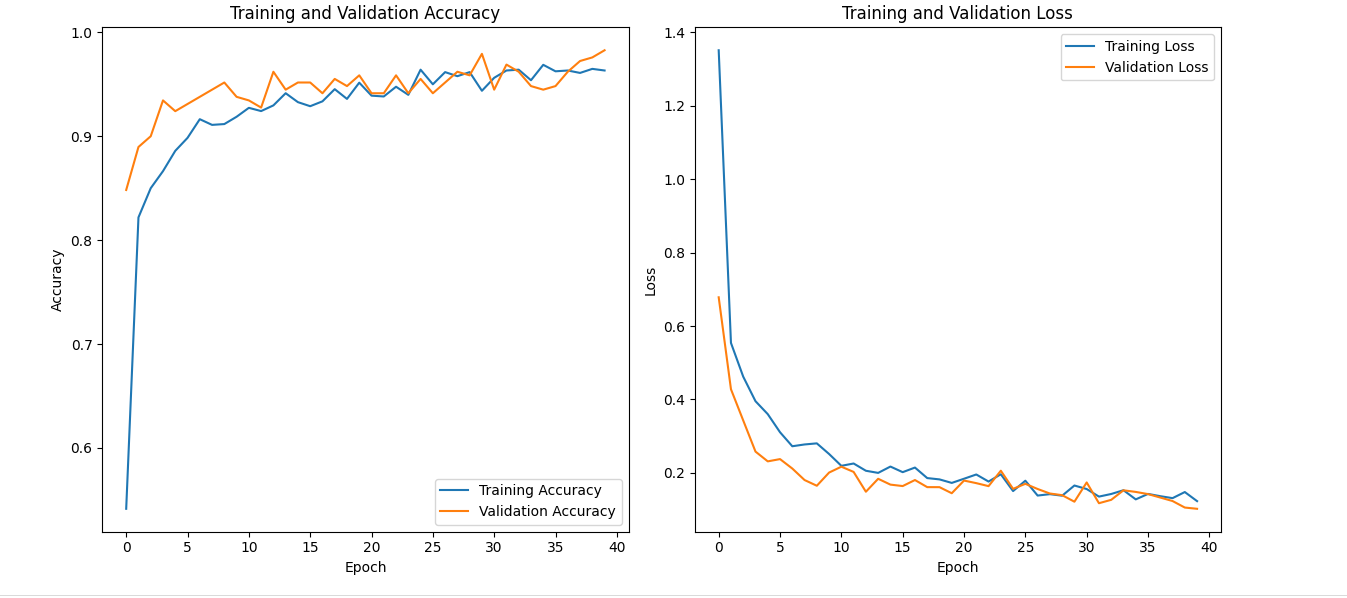

In [ ]:
#ACCURACY TESTING SCRIPT
#ANOTHER CUSTOM SCRIPT WRITTEN TO CHECK ACCURACY IN A SATISFYING MANNER

from google.colab import drive
import os


drive.mount('/content/gdrive')
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from PIL import Image, ImageOps
import os

import tensorflow as tf

from tensorflow.keras import layers, models

DATA_DIR = '/content/gdrive/My Drive/REGATTA_AI_OFFICIAL/'

model = load_model(DATA_DIR + "Model/augmented_mobilenet.keras")

data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

total = 0
correct = 0

# data_dir = DATA_DIR + "test"
data_dir = DATA_DIR + "Test2"
for image_class in os.listdir(data_dir):
	print(image_class + "\n\n\n")
	for image in os.listdir(os.path.join(data_dir, image_class)):
		print(image)
		image_path = os.path.join(data_dir, image_class, image)
		image = Image.open(image_path).convert("RGB")

		# resizing the image to be at least 224x224 and then cropping from the center
		size = (224, 224)
		image = ImageOps.fit(image, size, Image.Resampling.LANCZOS)

		# turn the image into a numpy array
		image_array = np.asarray(image)

		# Normalize the image
		normalized_image_array = (image_array.astype(np.float32) / 256)

		# Load the image into the array
		data[0] = normalized_image_array

		# Predicts the model
		prediction = model.predict(data)
		result = np.argmax(prediction, axis=1)
		objects = {'tyretube' : 6,
			   'ladder': 3,
			   'oar':4,
			   'barrel': 1,
			   'stringball':5,
			   'bamboo': 0,
			   'juterope': 2}
		total +=1


		for key, value in objects.items():
			if result[0] ==  value:
				print(key, image_class)
				if key in image_class:
					correct +=1




print(correct/total)

In [ ]:
import random
from google.colab import drive
import os
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from PIL import Image, ImageOps
import os
import time
import tensorflow as tf
import datetime
from datetime import timedelta
from tensorflow.keras import layers, models
from openpyxl import Workbook, load_workbook
from openpyxl.utils import get_column_letter
import math


In [ ]:
#GOOGLE DRIVE SETUP AND EXCEL


drive.mount('/content/gdrive')

DATA_DIR = '/content/gdrive/My Drive/REGATTA_AI_OFFICIAL/'
SHARED = '/content/gdrive/My Drive/'

os.listdir(DATA_DIR)

global excel_path


Mounted at /content/gdrive


In [ ]:
#LOADING MODEL
# model = load_model(DATA_DIR + "Model/final.keras")
model = load_model(DATA_DIR + "Model/ai_auction.keras") # ADDED ADDITIONAL LAYER FOR CLASSIFICATION
# class_names = open(DATA_DIR + "Model/labels.txt", "r").readlines()
model.summary()



Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip_2 (RandomFlip)  (None, 224, 224, 3)       0         
                                                                 
 random_flip_3 (RandomFlip)  (None, 224, 224, 3)       0         
                                                                 
 random_rotation_2 (RandomR  (None, 224, 224, 3)       0         
 otation)                                                        
                                                                 
 random_zoom_1 (RandomZoom)  (None, 224, 224, 3)       0         
                                                                 
 random_translation_1 (Rand  (None, 224, 224, 3)       0         
 omTranslation)                                                  
                                                                 
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)       

In [ ]:
#LOADING IMAGE


excel_path = SHARED + "Team5.xlsx"

if os.path.exists(excel_path):
    workbook = load_workbook(excel_path)
else:
    workbook = Workbook()
    workbook.save(excel_path)


sheet_name = "sheet5"

global price
global max_price
global item_count
global budget
budget = 27000
global bid_num
bid_num = 1


global threshold
threshold = 121


price = {
    "bamboo" : 1101,
    "stringball" : 601,
    "juterope" : 601,
    "tyretube" : 801,
    "barrel" : 801,
    "oar" : 301,
    "ladder" : 101}

max_price = {
    # "bamboo" : 2301,  #size : 10ft
    "bamboo" : 2001,  #size : 8ft
    #"bamboo" : 1101,  #size : 6ft
    "stringball" : 1001,
    "juterope" : 1201,
    "tyretube" : 1101,
    "barrel" : 1001,
    "oar" : 801,
    "ladder" : 401}

item_count = {
    "bamboo" : 4,
    "stringball" : 0,
    "juterope" : 2,
    "tyretube" : 4,
    "barrel" : 0,
    "oar" : 4,
    "ladder" : 0
}


def highest_bidder(bid_num):
  global excel_path
  cell1, cell2 = None, None

  count = 0
  while (cell1 == None or cell2 == None) and count < 4:
    count +=1
    drive.mount('/content/gdrive', force_remount = True)
    workbook1 = load_workbook(excel_path)
    sheet = workbook1[sheet_name]
    cell1, cell2 = sheet.cell(row = bid_num, column = 5).value, sheet.cell(row = bid_num, column = 6).value
    workbook1.close()
    time.sleep(1)
    print(cell1, cell2)  ## FOR DEBUGGING AND MAKING SURE NOTHING IS GOING WRONG
  return [cell1, cell2]

def make_bid(item, bid):

  global bid_num, excel_apth, threshold, budget
  workbook = load_workbook(excel_path)
  sheet = workbook[sheet_name] if sheet_name in workbook.sheetnames else workbook.create_sheet(sheet_name)

  if item_count[item] <=0 and bid > max_price[item] * (65/100): # Even if requirements for boat are complete collect some cheap items to sell
    bid = random.randint(int(max_price[item] * (30/100)), int(max_price[item] * (50/100)))  ## Since we dont plan to buy it we bid less than 50% to add guilt for the high priced buyer encouraging lower bid in next round.
  if bid > max_price[item]:
    bid = max_price[item]
  if bid > budget:
    bid = budget
  print("[+] BID PLACED FOR:", bid)

  next_row = 1
  while sheet.cell(row=next_row, column=1).value is not None:
      next_row += 1

# Append data to the next empty row
  sheet.cell(row=next_row, column=4).value = (datetime.datetime.now() + timedelta(hours=5)).strftime("%Y-%m-%d %H:%M:%S")
  sheet.cell(row=next_row, column=1).value = "Squarepant Sailors"
  sheet.cell(row=next_row, column=2).value = item
  sheet.cell(row=next_row, column=3).value = bid
  workbook.save(excel_path)
  workbook.close()
  bidder = highest_bidder(bid_num)
  bid_num +=1
  if bidder[0] == "Squarepant Sailors":
    budget = budget - bid
    print("[!] Money Left:", budget)
    item_count[item] = item_count[item] - 1
  else:
    try:
      highest = bidder[1]
      print(highest)
      price[item] = math.ceil((highest * threshold/100))
    except Exception as e:
      print(e)
      print(price[item])




def detect_image(image_path):
  data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)
  image = Image.open(image_path).convert("RGB")

  size = (224, 224)
  image = ImageOps.fit(image, size, Image.Resampling.LANCZOS)


  image_array = np.asarray(image)


  normalized_image_array = (image_array.astype(np.float32) / 256)

  data[0] = normalized_image_array

  # Predicts the model
  prediction = model.predict(data)
  result = np.argmax(prediction, axis=1)
  objects = { 6: 'tyretube',
        3:'ladder',
        4:'oar',
        1:'barrel',
        5: 'stringball',
        0 : 'bamboo',
        2: 'juterope'}
  return objects[result[0]]




## ALGORITHM WAS DESIGNED TO SPECIFICALLY CATER ALL THE RISKS AND ALL THE DANGERS OF USING AI.
"""
HAS A COUNTER FOR EACH ITEM TO NOT OVER BUY.
HAS A BUDGET TO NOT BID MORE THAN WE OWN.
WHEN NOT INTERESTED IN THE BID. PLACE A BID FROM 20-50% TO CREATE AN EFFECT OF DEMOTIVATING THE HIGHEST BIDDER WHILE MAINTAINING THE CREDIBILITY OF THE BID.
HAS MAX PRICES TO AVOID OVERBIDDING.
AUTO BIDDING FOR ITEMS GOING CHEAP TO SELL LATER.
APPENDING IN GOOGLE SHEETS AND AUTOMATICALLY PICKING UP HIGHEST BIDS.
QUICKEST METHOD TO FIND INCOMMING IMAGES WHILE IGNORING FOLDERS AND CHECKPOINTS.
FUNCTION BASED APPROACH FOR CODE CLARITY. (COULDVE IMPROVED WITH OBJECT ORIENTED)
"""



In [ ]:



image_dir = SHARED + "test/images"
images_completed = []
while 1:
  for current in os.listdir(image_dir):
    if current not in images_completed and current.find(".") !=-1 and current != ".ipynb_checkpoints":  ## To avoid ipynb checkpoint folder
      item = detect_image(f"{image_dir}/{current}")
      print(item)
      bid = price[item]

      make_bid(item, bid)

      images_completed.append(current)
      time.sleep(0.2)
